Recursos: https://www.getpostman.com/downloads/

# API

Basicamente: Interface entre dois ou mais programas de modo que eles possam se comunicar.

"Application Programming Interface" que significa em tradução para o português "Interface de Programação de Aplicativos".

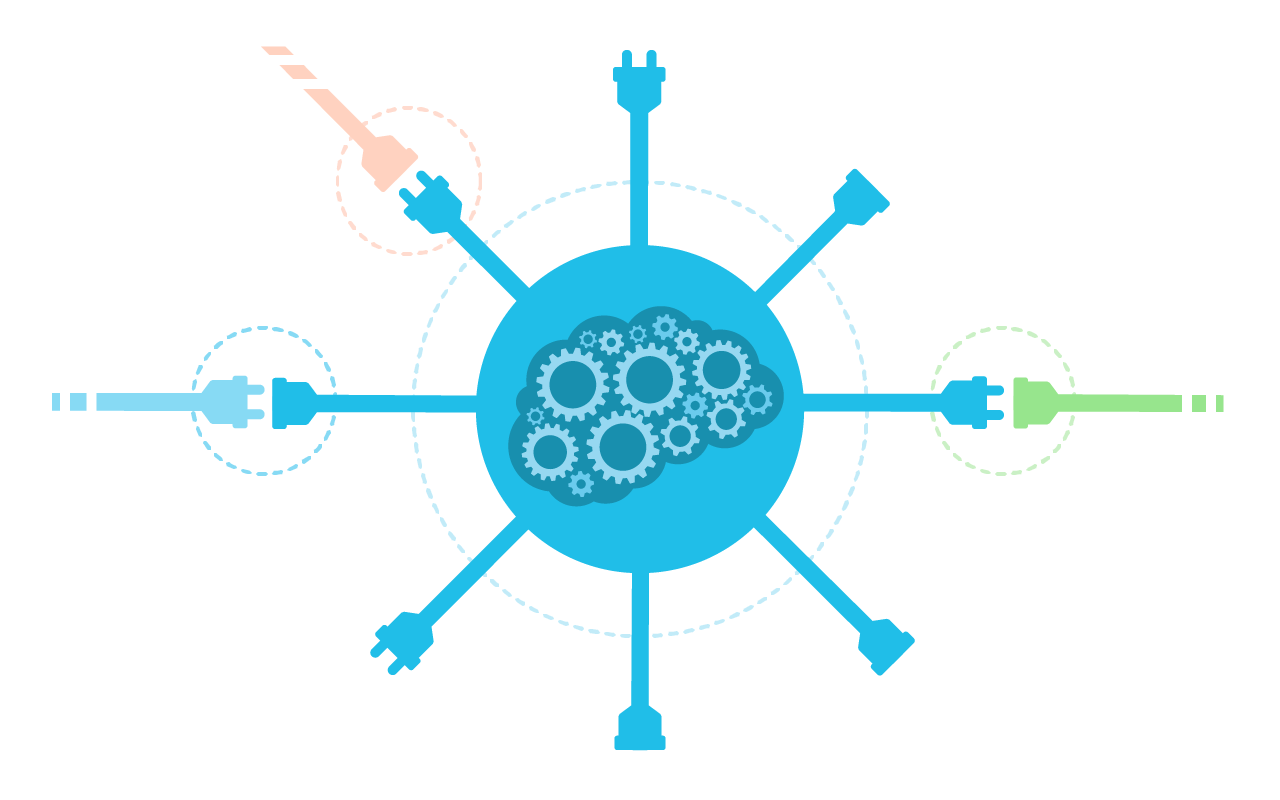

## Get (Ler)

## Post (Inserir)

## Put (Alterar)

## Delete (Remover)

## CRUD

## REST

Basicamente: o REST (Representational State Transfer / Transferência de Estado Representacional) consiste em regras e princípios que, quando seguidas, permitem a criação de um projeto com interfaces bem definidas. Desta forma, permitindo, por exemplo, que aplicações se comuniquem.

# Começando

- Verificar a versão do Python no terminal com:

```python --version```

- Mudar para a versão 3.7

```alias python=python3.7```

In [1]:
!pip install Flask

In [2]:
!pip install Flask-Restful

     |████████████████████████████████| 51kB 352kB/s eta 0:00:011


In [3]:
!pip install Flask-SQLAlchemy

# Criar um arquivo ```app.py```

In [ ]:
from flask import Flask
from flask_restful import Resource, Api

app = Flask(__name__)
api = Api(app)

class ContasBancarias(Resource):
    
    def get(self):
        pass
    
    def post(self):
        pass
    
    def put(self):
        pass
    
    def delete(self):
        pass
    
api.add_resource(ContasBancarias, '/contas')

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
def get(self):
    return {'contas': 'contas bancarias'}

Rodar no terminal: ```python app.py```



# Abrindo o Postman

## Entrar em Collection
<img src="Postman1.png" alt="Drawing" style="width: 600px;"/>


## Criar e nomear nova Collection
<img src="Postman2.png" alt="Drawing" style="width: 400px;"/>


## Adicionar uma requisição
<img src="Postman3.png" alt="Drawing" style="width: 400px;"/>


## Adicionar ```/contas``` e salvar
<img src="Postman4.png" alt="Drawing" style="width: 400px;"/>

## Adicionar destino e apertar ```Send```
<img src="Postman5.png" alt="Drawing" style="width: 400px;"/>

# Adicionando a Pasta Resources

## Criando o arquivo ```__init__.py```

## Criando o arquivo ```conta.py```

### Add recursos ao arquivo ```conta.py```

In [ ]:
from flask_restful import Resource

class ContasBancarias(Resource):
    
    def get(self):
        return {'contas': contas}
    
    def post(self):
        pass
    
    def put(self):
        pass
    
    def delete(self):
        pass

contas = [

{
    'numero_conta': '01',
    'nome': 'Alice',
    'Saldo': 10000,
},
{
    'numero_conta': '02',
    'nome': 'Bob',
    'Saldo': 12000,
},
{
    'numero_conta': '03',
    'nome': 'Carol',
    'Saldo': 15000,
}

]


### Alterando ```app.py```

In [ ]:
from flask import Flask
from flask_restful import Api
from resources.conta import ContasBancarias

app = Flask(__name__)
api = Api(app)
    
api.add_resource(ContasBancarias, '/contas')

if __name__ == '__main__':
    app.run(debug=True)

# Adicionando as Funcionalidades do CRUD

## Implementando GET

<img src="Postman6.png" alt="Drawing" style="width: 400px;"/>

<img src="Postman7.png" alt="Drawing" style="width: 400px;"/>

<img src="Postman8.png" alt="Drawing" style="width: 400px;"/>

### Depois add o caminho nos 4 abaixo e salvar

<img src="Postman9.png" alt="Drawing" style="width: 400px;"/>

<img src="Postman10.png" alt="Drawing" style="width: 800px;"/>

### Alterando ```app.py```

In [ ]:
from flask import Flask
from flask_restful import Api
from resources.conta import ContasBancarias, Conta

app = Flask(__name__)
api = Api(app)
    
api.add_resource(ContasBancarias, '/contas')
# adicionando novo endpoint
api.add_resource(Conta, '/contas/<string:numero_conta>')

if __name__ == '__main__':
    app.run(debug=True)


### Alterando ```conta.py```

In [ ]:
from flask_restful import Resource



contas = [

{
    'numero_conta': '01',
    'nome': 'Alice',
    'Saldo': 10000,
},
{
    'numero_conta': '02',
    'nome': 'Bob',
    'Saldo': 12000,
},
{
    'numero_conta': '03',
    'nome': 'Carol',
    'Saldo': 15000,
}

]

class ContasBancarias(Resource):
    
    def get(self):
        return { 'contas' : contas }
    
    def post(self):
        pass
    
    def put(self):
        pass
    
    def delete(self):
        pass


class Conta(Resource):

    def get(self, numero_conta):
        for conta in contas:
            if conta['numero_conta'] == numero_conta:
                return conta
        return { 'mensagem' : 'conta nao achada' }, 404
    
    def post(self, numero_conta):
        pass
    
    def put(self, numero_conta):
        pass
    
    def delete(self, numero_conta):
        pass

## Implementando POST

- Em Post, Buscar BODY, depois selecionar RAW e em Text mudar para JSON
<img src="Postman11.png" alt="Drawing" style="width: 800px;"/>


- Colar e Salvar o Modelo (Atenção as aspas duplas)
<img src="Postman12.png" alt="Drawing" style="width: 800px;"/>
- importar ```reqparse``` do modulo ```flask_restful``` 

### Modificando ```conta.py```

In [ ]:
from flask_restful import Resource, reqparse

contas = [

{
    'numero_conta': '01',
    'nome': 'Alice',
    'Saldo': 10000
},
{
    'numero_conta': '02',
    'nome': 'Bob',
    'Saldo': 12000
},
{
    'numero_conta': '03',
    'nome': 'Carol',
    'Saldo': 15000
}

]

class ContasBancarias(Resource):
    
    def get(self):
        return { 'contas' : contas }
    

class Conta(Resource):

    def get(self, numero_conta):
        for conta in contas:
            if conta['numero_conta'] == numero_conta:
                return conta
        return { 'mensagem' : 'conta nao achada' }, 404
    
    def post(self, numero_conta):
        for conta in contas:
            if conta['numero_conta'] == numero_conta:
                return 'conta existente'

        argumentos = reqparse.RequestParser()
        argumentos.add_argument('nome', type=str)
        argumentos.add_argument('Saldo', type=float)

        json = argumentos.parse_args()
        
        nova_conta = { 
            'numero_conta': numero_conta,
            'nome': json['nome'],
            'Saldo': json['Saldo']
        }

        contas.append(nova_conta)
        return nova_conta, 200

    def put(self, numero_conta):
        pass
    
    def delete(self, numero_conta):
        pass

### Modificando ```app.py```

In [ ]:
from flask import Flask
from flask_restful import Api
from resources.conta import ContasBancarias, Conta

app = Flask(__name__)
api = Api(app)
    
api.add_resource(ContasBancarias, '/contas')
# adicionando novo endpoint
api.add_resource(Conta, '/contas/<string:numero_conta>')

if __name__ == '__main__':
    app.run(debug=True)


## Implementando PUT

### Modificando ```conta.py```

In [ ]:
from flask_restful import Resource, reqparse

contas = [

{
    'numero_conta': '01',
    'nome': 'Alice',
    'Saldo': 10000
},
{
    'numero_conta': '02',
    'nome': 'Bob',
    'Saldo': 12000
},
{
    'numero_conta': '03',
    'nome': 'Carol',
    'Saldo': 15000
}

]

class ContasBancarias(Resource):
    
    def get(self):
        return { 'contas' : contas }
    

class Conta(Resource):

    argumentos = reqparse.RequestParser()
    argumentos.add_argument('nome', type=str)
    argumentos.add_argument('Saldo', type=float)

    # implementando achar_conta
    def achar_conta(numero_conta):
        for conta in contas:
            if conta['numero_conta'] == numero_conta:
                return conta
        return None        

    def get(self, numero_conta):
        conta = Conta.achar_conta(numero_conta)
        if conta == None:
            return { 'mensagem' : 'conta nao achada' }, 404
        else:
            return conta
    
    def post(self, numero_conta):
        conta = Conta.achar_conta(numero_conta)
        if conta != None:
            return 'conta existente', 404

        json = Conta.argumentos.parse_args()
        
        nova_conta = { 
            'numero_conta': numero_conta,
            'nome': json['nome'],
            'Saldo': json['Saldo']
        }

        contas.append(nova_conta)
        return nova_conta, 200

    def put(self, numero_conta):

        json = Conta.argumentos.parse_args()
        nova_conta = { 'numero_conta': numero_conta, **json }
        conta = Conta.achar_conta(numero_conta)

        if conta:
            conta.update(nova_conta)
            return nova_conta, 200
        else:
            contas.append(nova_conta)
            return nova_conta, 201

    
    def delete(self, numero_conta):
        pass

## Implementando DELETE

In [ ]:
from flask_restful import Resource, reqparse

contas = [

{
    'numero_conta': '01',
    'nome': 'Alice',
    'Saldo': 10000
},
{
    'numero_conta': '02',
    'nome': 'Bob',
    'Saldo': 12000
},
{
    'numero_conta': '03',
    'nome': 'Carol',
    'Saldo': 15000
}

]

class ContasBancarias(Resource):
    
    def get(self):
        return { 'contas' : contas }
    

class Conta(Resource):

    argumentos = reqparse.RequestParser()
    argumentos.add_argument('nome', type=str)
    argumentos.add_argument('Saldo', type=float)

    # implementando achar_conta
    def achar_conta(numero_conta):
        for conta in contas:
            if conta['numero_conta'] == numero_conta:
                return conta
        return None        

    def get(self, numero_conta):
        conta = Conta.achar_conta(numero_conta)
        if conta == None:
            return { 'mensagem' : 'conta nao achada' }, 404
        else:
            return conta
    
    def post(self, numero_conta):
        conta = Conta.achar_conta(numero_conta)
        if conta != None:
            return 'conta existente', 404

        json = Conta.argumentos.parse_args()
        
        nova_conta = { 
            'numero_conta': numero_conta,
            'nome': json['nome'],
            'Saldo': json['Saldo']
        }

        contas.append(nova_conta)
        return nova_conta, 200

    def put(self, numero_conta):

        json = Conta.argumentos.parse_args()
        nova_conta = { 'numero_conta': numero_conta, **json }
        conta = Conta.achar_conta(numero_conta)

        if conta:
            conta.update(nova_conta)
            return nova_conta, 200
        else:
            contas.append(nova_conta)
            return nova_conta, 201

    
    def delete(self, numero_conta):
        global contas 
        contas = [ conta for conta in contas if conta['numero_conta'] != numero_conta ]
        return 'conta deletada'

In [ ]:
pd.read_sql_query(query, conn)

https://stackoverflow.com/questions/372885/how-do-i-connect-to-a-mysql-database-in-python

```python

import pandas as pd
import mysql.connector

# Setup MySQL connection
db = mysql.connector.connect(
    host="<IP>",              # your host, usually localhost
    user="<USER>",            # your username
    password="<PASS>",        # your password
    database="<DATABASE>"     # name of the data base
)   

# You must create a Cursor object. It will let you execute all the queries you need
cur = db.cursor()

# Use all the SQL you like
cur.execute("SELECT * FROM <TABLE>")

# Put it all to a data frame
sql_data = pd.DataFrame(cur.fetchall())
sql_data.columns = cur.column_names

# Close the session
db.close()

# Show the data
print(sql_data.head())

```

```python

from __future__ import print_function
import MySQLdb
import numpy as np
import pandas as pd
import xlrd

# Connecting to MySQL Database
connection = MySQLdb.connect(
             host="hostname",
             port=0000,
             user="userID",
             passwd="password",
             db="table_documents",
             charset='utf8'
           )
print(connection)
#getting data from database into a dataframe
sql_for_df = 'select * from tabledata'
df_from_database = pd.read_sql(sql_for_df , connection)

```

In [3]:
def funcao(**argumentos):
    for chave, valor in argumentos.items():
        print(f'{chave}: {valor}')

In [4]:
funcao(nome='Aline', idade='33', sexo='F')

nome: Aline
idade: 33
sexo: F


In [10]:
del diametro

In [11]:
global diametro
diametro =10

In [14]:
def atualizar_diametro(adicional):
    global diametro
    diametro = diametro + adicional
    return diametro

In [15]:
atualizar_diametro(20)

30

In [16]:
nomes = ['alice', 'bob', 'carol']

In [29]:
tirar = 'carol'
[ nome for nome in nomes if nome != tirar]

['alice', 'bob']

In [27]:
[ nome.upper() if nome == 'carol' else 'carlos' for nome in nomes]

['carlos', 'carlos', 'CAROL']

In [ ]:
contas = [ conta for conta in contas if conta['numero_conta'] != numero_conta ]